In [1]:
import geopandas as gpd, matplotlib.pyplot as plt, numpy as np, pandas as pd

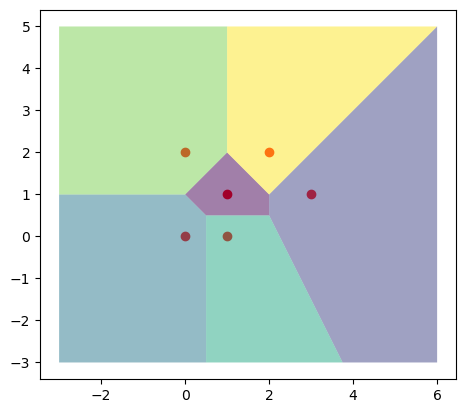

In [2]:
from geopandas import GeoDataFrame
from shapely.geometry import MultiPoint
from shapely.ops import voronoi_diagram

red = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
regions = voronoi_diagram(red)

# FROM GEOMETRIES TO GeoDataFrame
red = GeoDataFrame([{"geometry": red}])
regions = GeoDataFrame([{"gid": i, "geometry": geom} for i, geom in enumerate(regions.geoms)])

# MAPPING
ax = red.plot(color="red")
regions.plot(ax=ax, column="gid", alpha=0.5)
plt.show()

In [3]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


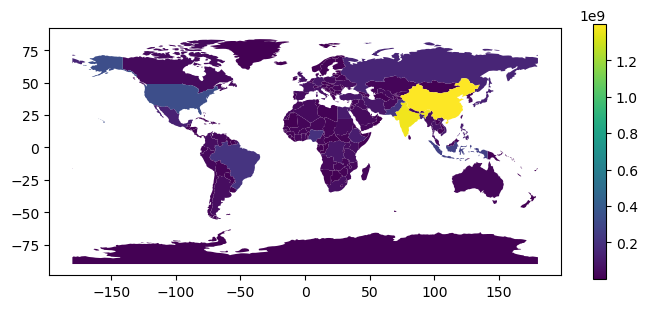

In [4]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(1*8.26, 0.4*8.26))
countries.plot(ax=ax, column="pop_est", legend=True)
plt.show()
plt.close(fig)

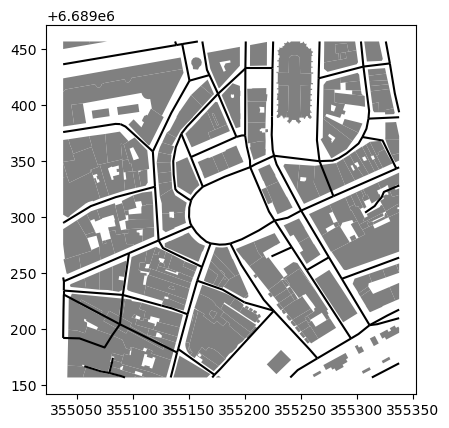

Building areas: 49420 m^2


In [5]:
from t4gpd.demos.GeoDataFrameDemos import GeoDataFrameDemos

buildings = GeoDataFrameDemos.districtRoyaleInNantesBuildings()
roads = GeoDataFrameDemos.districtRoyaleInNantesRoads()

ax = buildings.plot(color="grey")
roads.plot(ax=ax, color="black")
plt.show()

print(f"Building areas: {buildings.area.sum():.0f} m^2")

In [6]:
buildings.to_file("data/buildings.gpkg", driver="GPKG")

In [7]:
from geopandas import read_file

buildings = read_file("data/buildings.gpkg", driver="GPKG")
assert 49419.7 == round(buildings.area.sum(), 1), "Check building areas"